# Assignment 5: Explainable Techniques

Kelly Tong

Link to Colab: https://colab.research.google.com/drive/1uZGIZjHVn7FjdhRqJ9Kgq9pERzkYUrQc#scrollTo=7GlXZIrLXKNE

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kelly0604/Assignment5_Explainable_Techniques/blob/main/Assignment5_Explainable_Techniques.ipynb)

### Link to Github Repository

In [2]:
# Link to Github
!git clone https://github.com/Kelly0604/Assignment5_Explainable_Techniques.git
%cd /content/Assignment5_Explainable_Techniques
%ls
# update
!git pull

fatal: destination path 'Assignment5_Explainable_Techniques' already exists and is not an empty directory.
/content/Assignment5_Explainable_Techniques
Assignment5_Explainable_Techniques/  README.md  winequality_red.csv
Already up to date.


### Installing necessary packages

In [1]:
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 scikit-learn==1.2.2 lime==0.2.0.1 anchor-exp==0.0.2.0 shap==0.45.1

In [15]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
import anchor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

### Load and Read data

In [4]:
# load data
data = pd.read_csv('winequality_red.csv')

In [5]:
# read data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

### Modeling and Visualizing

In [16]:
# target variable being "quality" which is the last column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode the target variable to ensure classes start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=7)

# Train the RandomForestClassifier
model = RandomForestClassifier().fit(X_train, y_train)

In [19]:
# Use a sample of 100 instances for the background distribution
X100 = shap.utils.sample(X, 100)

# Create SHAP explainer using TreeExplainer
explainer = shap.TreeExplainer(model, X100)

# Compute SHAP values for the test set, disabling the additivity check
shap_values = explainer.shap_values(X_test, check_additivity=False)

 99%|===================| 4749/4800 [01:43<00:01]       

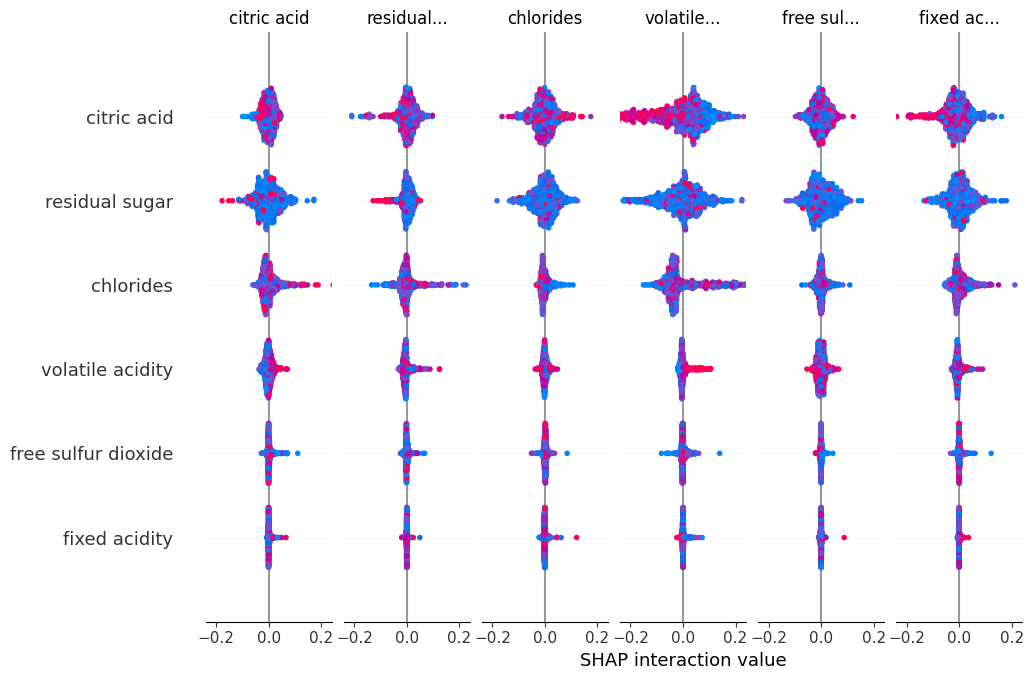

In [20]:
# Visualize summary plot
shap.summary_plot(shap_values, X_test)

### Interpretation for plot

The SHAP interaction plot above visualizes the interaction effects between features. In the plot, each column represents a feature (like 'chlorides' or 'citric acid'), and each row represents how a specific feature interacts with others. The SHAP interaction values indicate how one feature's contribution to the prediction depends on the value of another feature. Positive SHAP values contribute to pushing predictions towards one class, while negative SHAP values push towards another.

The color indicates the interaction strength, and points spread along the horizontal axis indicate SHAP values for individual instances. This plot helps you identify feature pairs with strong interactions and understand how they influence the model's predictions together, which is valuable for capturing more complex relationships in the data.

`Strengths:`

- - Highlights complex interactions between features that would not be captured by standard feature importance.
Helps identify the most important and interdependent features, giving deeper insights into the model's behavior.

`Limitations:`

- Hard to interpret without domain knowledge, as the significance of interactions is not always clear from the plot alone.
- Does not explicitly quantify the interaction effect beyond visual representation.

`Potential Improvements:`

- Overlaying statistical summaries for interaction strength would provide more quantitative insight.
- Grouping similar features together (for example, by chemical property or category) would make it easier to interpret the broader relationships.`